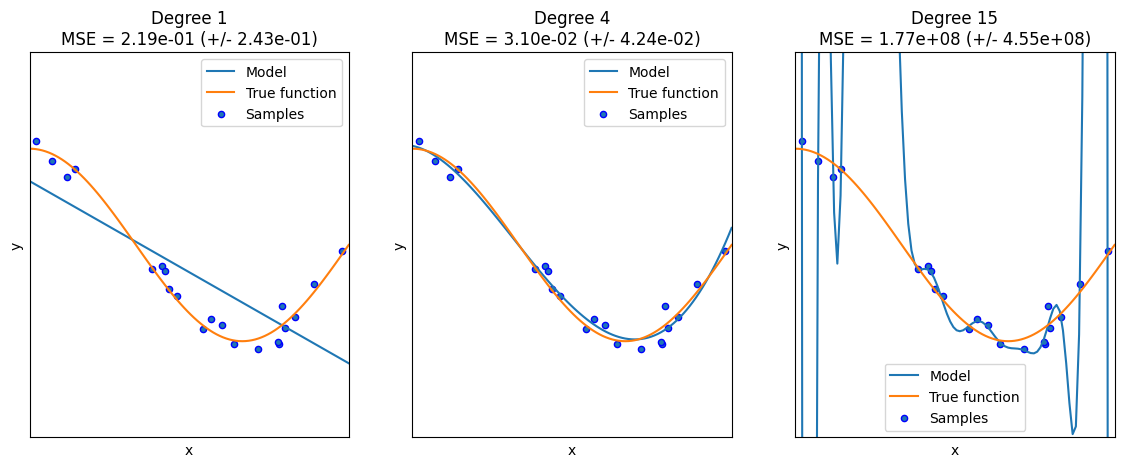

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline

# True function
def true_function(X):
    return np.cos(1.5 * np.pi * X)

# Generate data
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit models with different polynomial degrees
degrees = [1, 4, 15]
plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train)

    # Evaluate the models using cross-validation
    scores = cross_val_score(pipeline, X_train[:, np.newaxis], y_train, scoring="neg_mean_squared_error", cv=10)
    X_test_plot = np.linspace(0, 1, 100)
    plt.plot(X_test_plot, pipeline.predict(X_test_plot[:, np.newaxis]), label="Model")
    plt.plot(X_test_plot, true_function(X_test_plot), label="True function")
    plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degrees[i]}\nMSE = {-scores.mean():.2e} (+/- {scores.std():.2e})")

plt.show()


# Degree 1: The model is too simple (underfitting)

# Degree 4: The model fits the data well (good fit).

# Degree 15: The model is too complex (overfitting).

# EXPLANATION

# STEP 1

In [ ]:
numpy: For numerical operations.
    
matplotlib.pyplot: For plotting graphs.

sklearn.linear_model.LinearRegression: For linear regression.

sklearn.preprocessing.PolynomialFeatures: For generating polynomial features.

sklearn.model_selection.train_test_split: For splitting data into training and testing sets.

sklearn.model_selection.cross_val_score: For cross-validation.

sklearn.pipeline.Pipeline: For creating a pipeline of transformations and estimators.

# STEP 2

In [ ]:
Define the True Function

def true_function(X):
    return np.cos(1.5 * np.pi * X)

This function represents the true underlying pattern in the data, which is a cosine function.

# STEP 3

In [ ]:
Generate Sample Data

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.1

np.random.seed(0): Ensures reproducibility.
    
n_samples: Number of data points.

X: Randomly generated input data, sorted.

y: Output data with some added noise.

# STEP 4

In [ ]:
Split Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Splits the data into training (70%) and testing (30%) sets.

# STEP 5

In [ ]:
Fit Models with Different Polynomial Degrees

degrees = [1, 4, 15]
plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train)

    # Evaluate the models using cross-validation
    scores = cross_val_score(pipeline, X_train[:, np.newaxis], y_train, scoring="neg_mean_squared_error", cv=10)
    X_test_plot = np.linspace(0, 1, 100)
    plt.plot(X_test_plot, pipeline.predict(X_test_plot[:, np.newaxis]), label="Model")
    plt.plot(X_test_plot, true_function(X_test_plot), label="True function")
    plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degrees[i]}\nMSE = {-scores.mean():.2e} (+/- {scores.std():.2e})")

plt.show()


degrees: List of polynomial degrees to test.
    
plt.figure(figsize=(14, 5)): Sets the figure size for the plots.
    
for i in range(len(degrees)): Loops through each polynomial degree.
    
ax = plt.subplot(1, len(degrees), i + 1): Creates subplots.
    
PolynomialFeatures(degree=degrees[i], include_bias=False): Generates polynomial features of the specified degree.
    
LinearRegression(): Initializes the linear regression model.
    
Pipeline: Combines polynomial feature generation and linear regression into a single pipeline.
    
pipeline.fit(X_train[:, np.newaxis], y_train): Fits the model to the training data.
    
cross_val_score: Evaluates the model using cross-validation.
    
X_test_plot = np.linspace(0, 1, 100): Generates test data for plotting.

plt.plot: Plots the model predictions and the true function.
    
plt.scatter: Plots the training data points.
    
plt.xlabel, plt.ylabel, plt.xlim, plt.ylim, plt.legend, plt.title: Sets plot labels, limits, legend, and title.

